In [14]:
#import
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
import tensorflow as tf
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re


##Data imports

In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/qrst07/covid-sentiment-analysis/main/xaa.csv")
# df.tail(10)
# sns.countplot(df["text"])
# df["text"].value_counts()

## Text cleaning: preprocessing and using stopwords

Download stopwords using NLTK

In [24]:
print(df['text'].head(10))

0    Australia to Manufacture Covid-19 Vaccine and ...
1    #CoronavirusVaccine #CoronaVaccine #CovidVacci...
2    Deaths due to COVID-19 in Affected Countries\n...
3    @Team_Subhashree @subhashreesotwe @iamrajchoco...
4    @michellegrattan @ConversationEDU This is what...
5    The Multi-system Inflammatory Syndrome-Childre...
6    @PrivilRodrigues @yatish57 @deepkaranahuja @sh...
7    @MSNBC Well, let’s qualify that: would anyone ...
8    Most countries, without the ability to make #V...
9    #DNA  zooms up charts in 1st week; hear #vacci...
Name: text, dtype: object


In [25]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
nltk.download('punkt')

def process_text(a):
  filtered_list = []
  text_tokens = word_tokenize(str(a))  # remove repeated characters
  for i in text_tokens:
    if i.lower() not in stop_words:
      filtered_list.append(i)
  filtered_tweet = (" ").join(filtered_list)
  filtered_tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', filtered_tweet) # remove URLs
  filtered_tweet = re.sub('@[^\s]+', 'AT_USER', filtered_tweet) # remove usernames
  filtered_tweet = re.sub(r'#([^\s]+)', r'\1', filtered_tweet) # remove the # in #hashtag
  return filtered_tweet

df['text'] = df['text'].apply(process_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##Visualize the preprocessed data with wordcloud

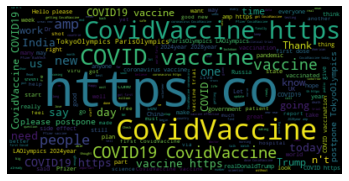

In [34]:
text = " ".join(tweet for tweet in df.text)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plot.imshow(wordcloud, interpolation='bilinear')
plot.axis("off")
plot.show()
#TODO: remove links in NLTK processing

## Use NLTK and VADER to score text and label data

In [27]:
from nltk import tokenize
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def score_text(text):
    sentence_list = tokenize.sent_tokenize(text)
    cscore = 0.0
    for sent in sentence_list:
        ss = analyzer.polarity_scores(sent)['compound']
        cscore += ss
    return cscore / len(sentence_list)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Add new 'sentiment' column to dataframe

In [29]:
df['sentiment'] = df['text'].map(lambda t : score_text(t))

In [35]:
print(df.filter(items = ['text', 'sentiment']).head(10))

                                                text  sentiment
0  Australia Manufacture Covid-19 Vaccine give Ci...    0.51060
1  # CoronavirusVaccine # CoronaVaccine # CovidVa...    0.44040
2  Deaths due COVID-19 Affected Countries Read : ...   -0.15310
3  @ Team_Subhashree @ subhashreesotwe @ iamrajch...    0.44040
4  @ michellegrattan @ ConversationEDU passes lea...    0.00000
5  Multi-system Inflammatory Syndrome-Children ( ...    0.00000
6  @ PrivilRodrigues @ yatish57 @ deepkaranahuja ...    0.00000
7  @ MSNBC Well , let ’ qualify : would anyone pa...    0.29295
8  countries , without ability make # Vaccines lo...   -0.35320
9  # DNA zooms charts 1st week ; hear # vaccines ...    0.00000


##Train-test split

In [37]:
from sklearn.model_selection import train_test_split
y = df['sentiment']
x = df['text']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print('Train data samples:', x_train.shape[0])
print('Test data samples:', x_test.shape[0])

Train data samples: 34526
Test data samples: 14798
